# Chest X-Ray Images (Pneumonia)
**Authors:** Carlos McCrum, Jared Mitchell, Andrew Bernklau
***

## Overview
We've been tasked to build a model to classify images that consist of x-rays of infected and healthy lungs at our local hospital. The data contains thousands of images Mendeley Data. We start by preprocessing the images and splitting into training and test sets. Next we build different models to see what performs best, including Logistic Regression, Random Forest and Neural Networks. Convolutional neural networks performed best and had the best accuracy. So our recommendations would include convolutional neural networks for classification as they performed the best. 



***

## Business Problem

The number of Pneumonia cases increased in the last few years with 1.5 million ER visits and 2 million deaths indicating around 16% increase. The goal of our project is to build a image classification model that can correctly identify between x-rays of infected and healthy lungs so we can lower these numbers. It's important that our model has high accuracy. With a low accuracy our model would misdiagnose too much or fail to diagnose someone who has pneumonia. Classifying images requires a lot of images for more accurate modeling and we are limited in the number of images we have at our disposal. We chose this route to see if modeling could help classify whether a person does or does not have a the Pneumonia to help radiology technicians at our local hospital.  

***

## Data Understanding

Our data comes from Mendeley Data, it contains a few thousand images Chest X-Ray described and analyzed in "Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning". The images are split into a training set and a testing set of independent patients. Images are labeled as (disease)-(randomized patient ID)-(image number by this patient). We are going to be classifying whether the images fall into the two classes either "NORMAL" or "PNEUMONIA"". We start buy preprocessing the data, then spliting it into training and validation sets then build a few different models to see what model perfoms best. 



***

In [1]:
# Import packages
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm 
import code.preparation as prep
import code.visualization as viz
np.random.seed(123)

## Data Preparation

We preprocessed the data in two ways. One for our logistic and random forest models splitting our data the standard way, and the other we preprocessed our images into tensors for our neural network modeling. We did it this way to have our images properly set for our models for the best performance. There were very few images that would not load and were discarded, there were no other null values in our data. 

***

### Preprocessing for Logitstic and Random Forest

Set path for our images.

In [2]:
train_path = 'data/chest_xray/train/'
test_path = 'data/chest_xray/test/'
val_path = 'data/chest_xray/val'

In [3]:
np.random.seed(123)
train_gen, test_gen, val_gen = prep.img_data_gen(train_path, test_path, val_path)

Found 5219 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


- Create datasets and reshape for our models to interpret. 

In [4]:
#train_data, test_data, val_data = prep.create_sets(train_gen, test_gen, val_gen)

In [5]:
# create the data sets
val_images, val_labels = tqdm(next(val_gen))
test_images, test_labels = tqdm(next(test_gen))
train_images, train_labels = tqdm(next(train_gen))

100%|██████████| 2/2 [00:00<00:00, 6056.76it/s]


### Data Augmentation

For data augmentation we take our images and alter them in many different ways to give our model more diversity in training images. This will give our model more to work with since we don't have enough data for a proper learning. 

In [6]:
data_aug = prep.data_aug()
data_aug.fit(train_images)

In [7]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5217, 196608)
(624, 196608)
(16, 196608)


In [8]:
train_y = np.reshape(train_labels[:,0], (5217,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

Pneumonia    0.742764
Normal       0.257236
dtype: float64


<AxesSubplot:ylabel='count'>

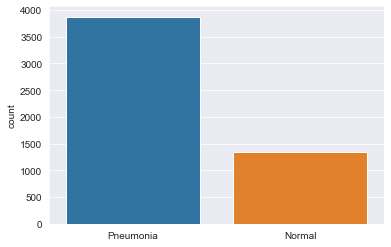

In [9]:
viz.class_inbalance(train_labels)

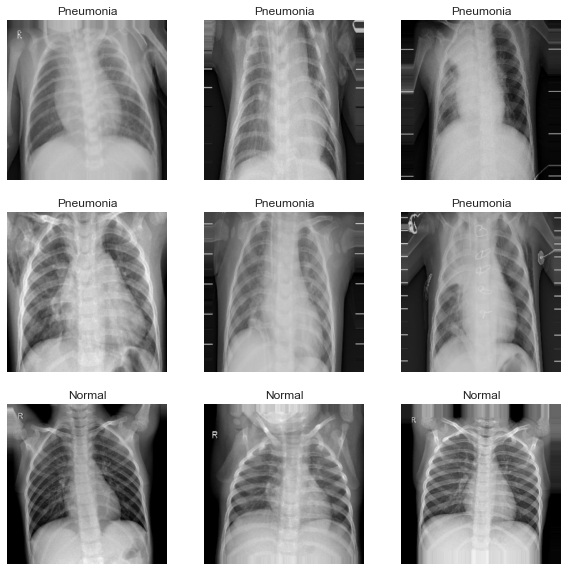

In [10]:
viz.preview_img(train_images, train_y)

## Data Modeling
We start off with a simple logistical regression model to see how it performs, we next move on to random forest modeling to see if we can get a better accuracy score, last we try convolutional neural networks to see how accurate we can make it so we don't have any false positives or false negatives. These are all models that work for classification, let's see how they perform. 

***

Start by running a logistical regression model with l2 regularization as our baseline. 

In [11]:
prep.logistic_regression_l2(train_img, train_y, test_img, test_y)

Test score of logistic regression model with L2 regularization: 0.8397435897435898


LogisticRegression()

Very good start, now we move on to our random forest to see if we can improve the accuracy of the results. 

In [12]:
RF_model = prep.random_forest(train_img, train_y, test_img, test_y)

Cross validation score for Random Forest: [0.92       0.904      0.88       0.872      0.83870968]
Test score of random forest model: 0.8397435897435898


Plot confusion matrix to visualize at how well our model classified our images. 

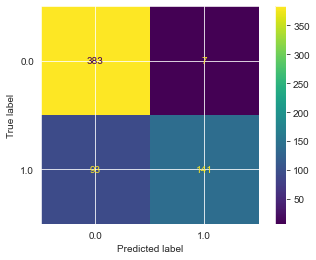

In [13]:
plot_confusion_matrix(RF_model, test_img, test_y);

Now we will try a convolutional neural network (CNN) as it is exceptional at image processing. We can utilize the convolutional operation to detect more complex features within the image. Let's start with one Conv2d and one MaxPooling2D layer.

In [14]:
history = prep.first_cnn(train_images, train_y, val_images, val_y, test_images, test_y)

Epoch 1/20
20/20 [==============================] - 12s 517ms/step - loss: 1.3690 - acc: 0.6844 - val_loss: 1.2742 - val_acc: 0.5000
Epoch 2/20
20/20 [==============================] - 10s 480ms/step - loss: 0.9092 - acc: 0.7500 - val_loss: 1.1783 - val_acc: 0.5000
Epoch 3/20
20/20 [==============================] - 10s 476ms/step - loss: 0.8869 - acc: 0.7563 - val_loss: 1.0732 - val_acc: 0.5000
Epoch 4/20
20/20 [==============================] - 10s 479ms/step - loss: 0.8882 - acc: 0.7344 - val_loss: 1.0300 - val_acc: 0.5000
Epoch 5/20
20/20 [==============================] - 10s 500ms/step - loss: 0.8220 - acc: 0.7812 - val_loss: 1.0209 - val_acc: 0.5000
Epoch 6/20
20/20 [==============================] - 10s 482ms/step - loss: 0.8066 - acc: 0.7531 - val_loss: 1.0720 - val_acc: 0.5000
Epoch 7/20
20/20 [==============================] - 10s 479ms/step - loss: 0.8732 - acc: 0.7188 - val_loss: 1.1117 - val_acc: 0.5000
Epoch 8/20
20/20 [==============================] - 10s 481ms/step - 

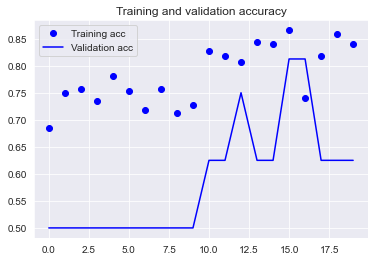

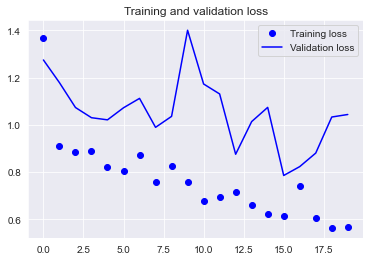

In [15]:
viz.accuracy_and_losses(history);

That CNN did nearly as good as the logisitic regression. Now we will add some layers and tuning to the CNN for improvement.

In [16]:
history = prep.final_model(train_images, train_y, test_images, test_y, val_images, val_y)

Epoch 1/20
50/50 [==============================] - 59s 1s/step - loss: 0.7126 - acc: 0.8075 - val_loss: 0.9539 - val_acc: 0.5000
Epoch 2/20
50/50 [==============================] - 63s 1s/step - loss: 0.2608 - acc: 0.8850 - val_loss: 2.2941 - val_acc: 0.5000
Epoch 3/20
50/50 [==============================] - 61s 1s/step - loss: 0.2728 - acc: 0.8875 - val_loss: 3.1746 - val_acc: 0.5000
Epoch 4/20
50/50 [==============================] - 57s 1s/step - loss: 0.2429 - acc: 0.9125 - val_loss: 4.1743 - val_acc: 0.5000
Epoch 5/20
50/50 [==============================] - 62s 1s/step - loss: 0.1742 - acc: 0.9375 - val_loss: 4.3898 - val_acc: 0.5000
Epoch 6/20
50/50 [==============================] - 58s 1s/step - loss: 0.2226 - acc: 0.9175 - val_loss: 3.8032 - val_acc: 0.5000
Epoch 7/20
50/50 [==============================] - 56s 1s/step - loss: 0.1708 - acc: 0.9200 - val_loss: 4.7159 - val_acc: 0.5000
Epoch 8/20
50/50 [==============================] - 59s 1s/step - loss: 0.2260 - acc: 0.91

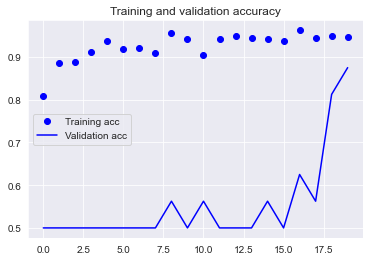

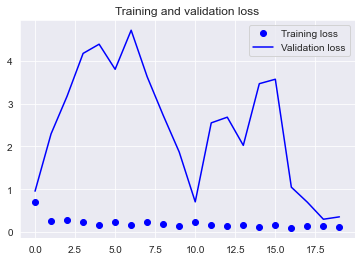

In [17]:
viz.accuracy_and_losses(history);

## Evaluation
Our best model came out to 90% accuracy score. After using dropout and other regularization techniques we our final model did better than either our logistic regression or random forest models. This shows us that our convolutional neural networks are working great by classifying our images. Our baseline with logistic regression was 84% which still fairy good, though on our final model we've made a significant improvement. With a 90% accuracy our model will be able to help our business problem but not solve it, because our model could never be as good as a human in this circumstance. 

***

## Conclusions

Should not be used as a diagnosis, it is a good educational tool for new students or radiologist technicians. It has a good accuracy but doesn't fully solve our business problem because for our model to be used professionally in the medical field it would have to have near perfect accuracy. With more data and resources we might be able to get a more accurate model, that is something we can look into for future research.  
***